In [25]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define data directory
train_data_dir = '/Users/lenevo/Desktop/Assignment_3/q_3_dataset/train'
test_data_dir = '/Users/lenevo/Desktop/Assignment_3/q_3_dataset/test'


Epoch [1/25], Train Loss: 1.3658, Train Accuracy: 0.3563, Test Accuracy: 0.3750
Epoch [2/25], Train Loss: 1.0712, Train Accuracy: 0.5375, Test Accuracy: 0.8000
Epoch [3/25], Train Loss: 0.8198, Train Accuracy: 0.8625, Test Accuracy: 0.8500
Epoch [4/25], Train Loss: 0.6453, Train Accuracy: 0.9062, Test Accuracy: 0.8500
Epoch [5/25], Train Loss: 0.5223, Train Accuracy: 0.9500, Test Accuracy: 0.8500
Epoch [6/25], Train Loss: 0.4219, Train Accuracy: 0.9625, Test Accuracy: 0.8500
Epoch [7/25], Train Loss: 0.3402, Train Accuracy: 0.9812, Test Accuracy: 0.8500
Epoch [8/25], Train Loss: 0.2988, Train Accuracy: 0.9750, Test Accuracy: 0.8500
Epoch [9/25], Train Loss: 0.2944, Train Accuracy: 0.9688, Test Accuracy: 0.8500
Epoch [10/25], Train Loss: 0.2231, Train Accuracy: 0.9875, Test Accuracy: 0.8750
Epoch [11/25], Train Loss: 0.1971, Train Accuracy: 0.9875, Test Accuracy: 0.8750
Epoch [12/25], Train Loss: 0.1790, Train Accuracy: 0.9812, Test Accuracy: 0.9000
Epoch [13/25], Train Loss: 0.1619, Tr

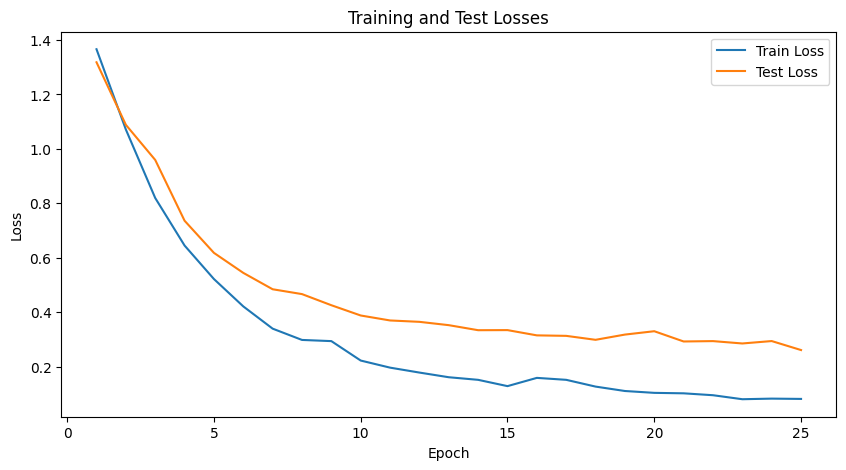

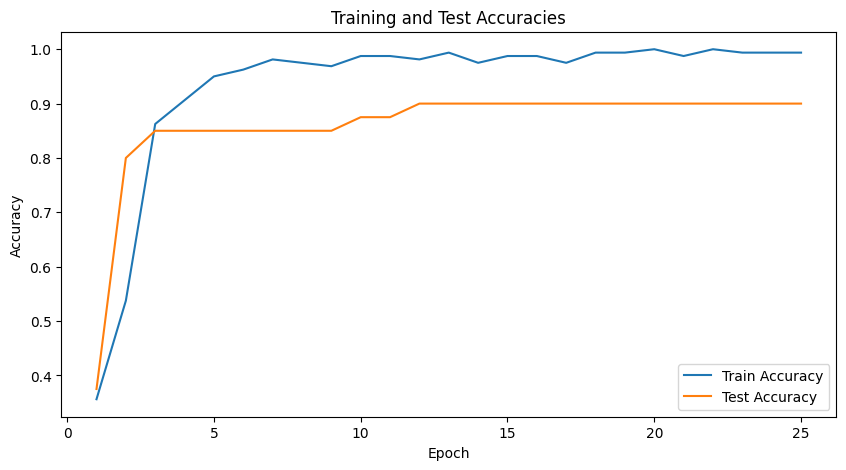

Final Test Accuracy: 0.9000


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset = ImageFolder(train_data_dir, transform=train_transform)
test_dataset = ImageFolder(test_data_dir, transform=test_transform)

# Define dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load pre-trained ResNet-18
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))  # Change output layer to match number of classes

# Freeze all layers except the final layer
for param in model.parameters():
    param.requires_grad = False
for param in model.fc.parameters():
    param.requires_grad = True

# Define optimizer and loss function
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
num_epochs = 25

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluation on test set
    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            test_loss += criterion(outputs, labels).item()

    test_accuracy = correct / total
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, '
          f'Test Accuracy: {test_accuracy:.4f}')

# Save the model if needed
torch.save(model.state_dict(), 'resnet18_model.pth')

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies')
plt.legend()
plt.show()

# Display final accuracy
print(f'Final Test Accuracy: {test_accuracies[-1]:.4f}')


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader


# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load dataset
dataset = ImageFolder(train_data_dir, transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3 * 224 * 224, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 3 * 224 * 224),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(x.size(0), 3, 224, 224)
        return x

# Instantiate model, criterion, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train autoencoder
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, _ in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')

# Evaluate autoencoder on test data and compute reconstruction errors
test_dataset = ImageFolder(test_data_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

reconstruction_errors = []
model.eval()
with torch.no_grad():
    for images, _ in test_loader:
        outputs = model(images)
        loss = criterion(outputs, images)
        reconstruction_errors.append(loss.item())

# Define a threshold for classification
threshold = 0.1  

# Identify outliers based on reconstruction error
outlier_indices = [i for i, error in enumerate(reconstruction_errors) if error > threshold]
print(f'Number of outliers detected: {len(outlier_indices)}')


Epoch [1/10], Loss: 0.1480
Epoch [2/10], Loss: 0.0973
Epoch [3/10], Loss: 0.0820
Epoch [4/10], Loss: 0.0774
Epoch [5/10], Loss: 0.0738
Epoch [6/10], Loss: 0.0689
Epoch [7/10], Loss: 0.0646
Epoch [8/10], Loss: 0.0619
Epoch [9/10], Loss: 0.0608
Epoch [10/10], Loss: 0.0601
Number of outliers detected: 3


In [36]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.svm import OneClassSVM
import numpy as np

# Define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = ImageFolder(train_data_dir, transform=transform)
test_dataset = ImageFolder(test_data_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load pre-trained ResNet model
resnet_model = models.resnet18(pretrained=True)
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))

# Load fine-tuned model weights
resnet_model.load_state_dict(torch.load('resnet18_model.pth'))
resnet_model.eval()

# Extract embeddings from the final layer
embeddings = []
labels = []
with torch.no_grad():
    for images, lbls in train_loader:
        outputs = resnet_model(images)
        embeddings.extend(outputs.numpy())
        labels.extend(lbls.numpy())

# Train SVM on embeddings
svm_model = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.1)  # Adjust gamma and nu as needed
svm_model.fit(embeddings)

# Evaluate SVM on test data
test_embeddings = []
with torch.no_grad():
    for images, _ in test_loader:
        outputs = resnet_model(images)
        test_embeddings.extend(outputs.numpy())

# Identify outliers based on SVM predictions
predictions = svm_model.predict(test_embeddings)
outlier_indices = np.where(predictions == -1)[0]
print(f'Number of outliers detected: {len(outlier_indices)}')


Number of outliers detected: 4
